<img src="https://github.com/AmsterdamUMC/AmsterdamUMCdb/raw/master/img/logo_amds.png" alt="Logo" style="width: 128px;"/>

# AmsterdamUMCdb - Freely Accessible ICU Database

version 1.0.1 January 2020  
Copyright &copy; 2003-2020 Amsterdam UMC - Amsterdam Medical Data Science

# <a id='procedureorderitems'></a>procedureorderitems table
The *procedureorderitems* table contains all orders for procedures and tasks, such drawing blood, perfforminroutine ICU nursing care and scoring. Please note that many of these tasks will lead to a result or observation, that can be found in the [freetextitems](freetextitems.ipynb#freetextitems), [listitems](listitems.ipynb#listitems) or [numericitems](numericitems.ipynb#numericitems) tables, depending on the type of documentation required. All items have an associated admissionid from the [admissions](admissions.ipynb#admissions) table.

## Fields

|Name|Type|Description|
|:---|:---|:---|
|admissionid|integer|links the items with the admissionid in the [admissions](admissions.ipynb#admissions) table|
|orderid|integer|unique number identifiying this order
|ordercategoryid|integer|id of procedure category 
|[ordercategoryname](#ordercategoryname)|string|name of procedure category
|itemid|integer|id of procedure name
|[item](#item)|string|procedure name
|registeredat|integer|time the result was stored in the database, expressed as milliseconds since the first ICU admission. 
|[registeredby](#registeredby)|string|user group that entered the result, e.g. nurses, physicians, etc.

# Example Python and SQL scripts

## Imports

In [0]:
%matplotlib inline
#gets the module from the repository for use in Colab
import os.path
try:
  if not os.path.isfile('amsterdamumcdb.py'):
    !wget https://raw.githubusercontent.com/AmsterdamUMC/AmsterdamUMCdb/master/tables/amsterdamumcdb.py
finally:
    import amsterdamumcdb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import io
from IPython.display import display, HTML, Markdown

# Imports for accessing Datathon data using Google BigQuery.
from google.colab import auth
from google.cloud import bigquery

## Display settings

In [0]:
#matplotlib settings for image size
#needs to be in a different cell from %matplotlib inline
plt.style.use('seaborn-darkgrid')
plt.rcParams["figure.dpi"] = 144
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 12

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 1000

## Connection settings

In [0]:
auth.authenticate_user()

project_id='milandaticu2020'
os.environ["GOOGLE_CLOUD_PROJECT"]=project_id
os.environ["GOOGLE_CLOUD_PROJECT"]

config = {'query': 
          {'defaultDataset': {
              "datasetId": 'amsterdamumcdb_v_1_0_1', 
              "projectId": 'amsterdamumcdb-data' 
              }
           }
          }

## Overview of all fields

In [4]:
sql = """
SELECT * FROM procedureorderitems
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(10)

``` mysql

SELECT * FROM procedureorderitems

```

,admissionid,orderid,ordercategoryid,ordercategoryname,itemid,item,registeredat,registeredby
0,5,7099532,116,Opdr. Voeding,20157,SNAQ score bepalen,80700000,ICV_IC-Verpleegkundig
1,17,7053045,116,Opdr. Voeding,13011,X-Opdr. Voeding,76620000,ICV_MC-Verpleegkundig
2,20,658400,88,Opdr. Infectie,9369,X-Opdr. Infectie,221220000,ICV_IC-Verpleegkundig
3,38,6548315,116,Opdr. Voeding,13011,X-Opdr. Voeding,3185700000,ICV_MC-Verpleegkundig
4,53,2481964,85,Opdr. Urologisch,9442,Eénmalig catheteriseren,2611020000,ICV_IC-Verpleegkundig
5,53,2484854,85,Opdr. Urologisch,9329,Catheteriseren,2765880000,ICV_IC-Verpleegkundig
6,53,2488216,85,Opdr. Urologisch,9329,Catheteriseren,2937600000,ICV_IC-Verpleegkundig
7,53,2490977,85,Opdr. Urologisch,14217,Bladderscan,3119820000,ICV_IC-Verpleegkundig
8,58,7288614,116,Opdr. Voeding,20157,SNAQ score bepalen,78960000,ICV_IC-Verpleegkundig
9,64,4447868,85,Opdr. Urologisch,9378,X-Opdracht Urologisch,101880000,ICV_MC-Verpleegkundig


In [5]:
df.describe()

,admissionid,orderid,ordercategoryid,itemid,registeredat
count,2.196116e+06,2.196116e+06,2.196116e+06,2.196116e+06,2.196116e+06
mean,1.172974e+04,4.129859e+06,8.835983e+01,1.191826e+04,6.592966e+09
std,6.722221e+03,2.186786e+06,1.036161e+01,3.075270e+03,2.905972e+10
min,0.000000e+00,7.000000e+00,7.300000e+01,7.921000e+03,-3.361800e+08
25%,6.094000e+03,2.249290e+06,8.200000e+01,9.377000e+03,1.996800e+08
50%,1.157200e+04,4.258046e+06,8.900000e+01,1.247300e+04,8.485800e+08
75%,1.756000e+04,6.057370e+06,9.000000e+01,1.302100e+04,2.430495e+09
max,2.355200e+04,7.660473e+06,1.160000e+02,2.124000e+04,3.916634e+11


## <a id='orderid'></a>orderid

In [6]:
sql = """
SELECT COUNT(*) AS Number_of_unique_observations FROM (
    SELECT DISTINCT orderid
    FROM procedureorderitems
    ) as unique_items_table
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df

``` mysql

SELECT COUNT(*) AS Number_of_unique_observations FROM (
    SELECT DISTINCT orderid
    FROM procedureorderitems
    ) as unique_items_table

```

,Number_of_unique_observations
0,2196116


``` mysql

SELECT COUNT(admissionid) AS procedures_per_admission
FROM procedureorderitems
GROUP BY admissionid

```

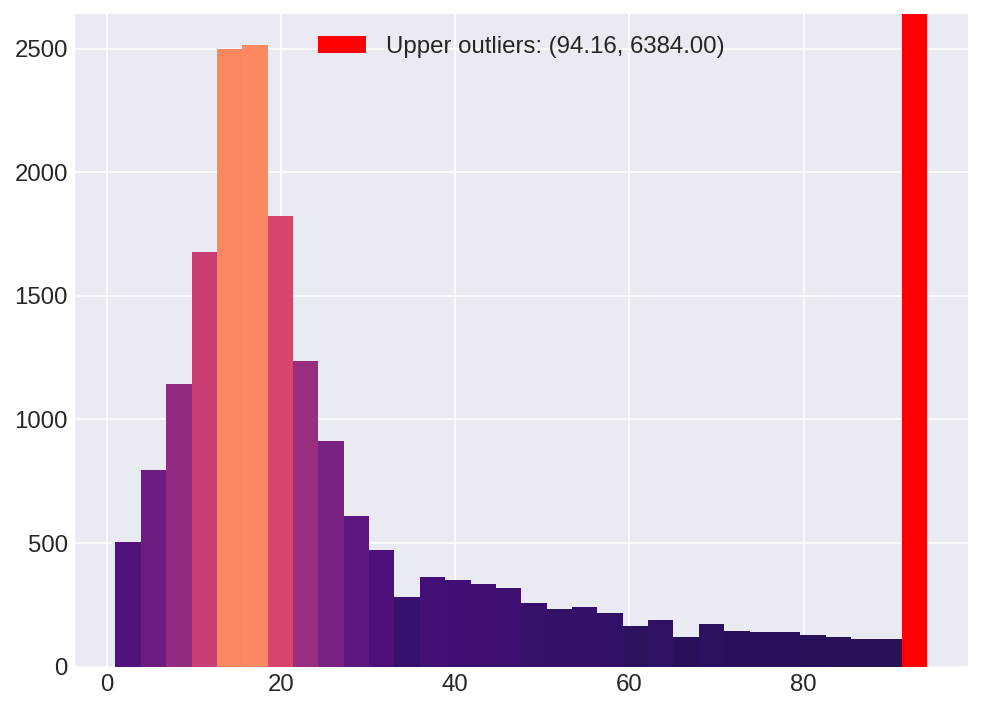

In [7]:
sql = """
SELECT COUNT(admissionid) AS procedures_per_admission
FROM procedureorderitems
GROUP BY admissionid
"""
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)

#plot the data
data = df['procedures_per_admission']
amsterdamumcdb.outliers_histogram(data, bins=32).show()

## <a id='item'></a>item

In [8]:
sql = """
SELECT item, COUNT(item) AS number_of_observations, itemid
FROM procedureorderitems
GROUP BY item, itemid
ORDER BY number_of_observations DESC
"""
import matplotlib as mpl
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
df.head(10)

``` mysql

SELECT item, COUNT(item) AS number_of_observations, itemid
FROM procedureorderitems
GROUP BY item, itemid
ORDER BY number_of_observations DESC

```

,item,number_of_observations,itemid
0,Gantt-lijst controle,244068,13021
1,Wisselligging,173182,12771
2,Decubitus score,107956,12896
3,Hielen vrijleggen,106055,12839
4,Pijnscore bepalen,88467,19661
5,Glucose afnemen,73436,9547
6,Drukzak vernieuwen,69901,9287
7,Opdr.\Proc. wijzigen,67336,9452
8,Lab. dgs Standaard 6.00u,64962,9446
9,Opnieuw profiel monitor en alarmen instellen,47017,20393


## <a id='ordercategoryname'></a>ordercategoryname

``` mysql

SELECT ordercategoryname AS Order_Category, COUNT(ordercategoryname) AS Number_of_tasks, ordercategoryid
FROM procedureorderitems
GROUP BY ordercategoryname, ordercategoryid
ORDER BY Number_of_tasks DESC

```

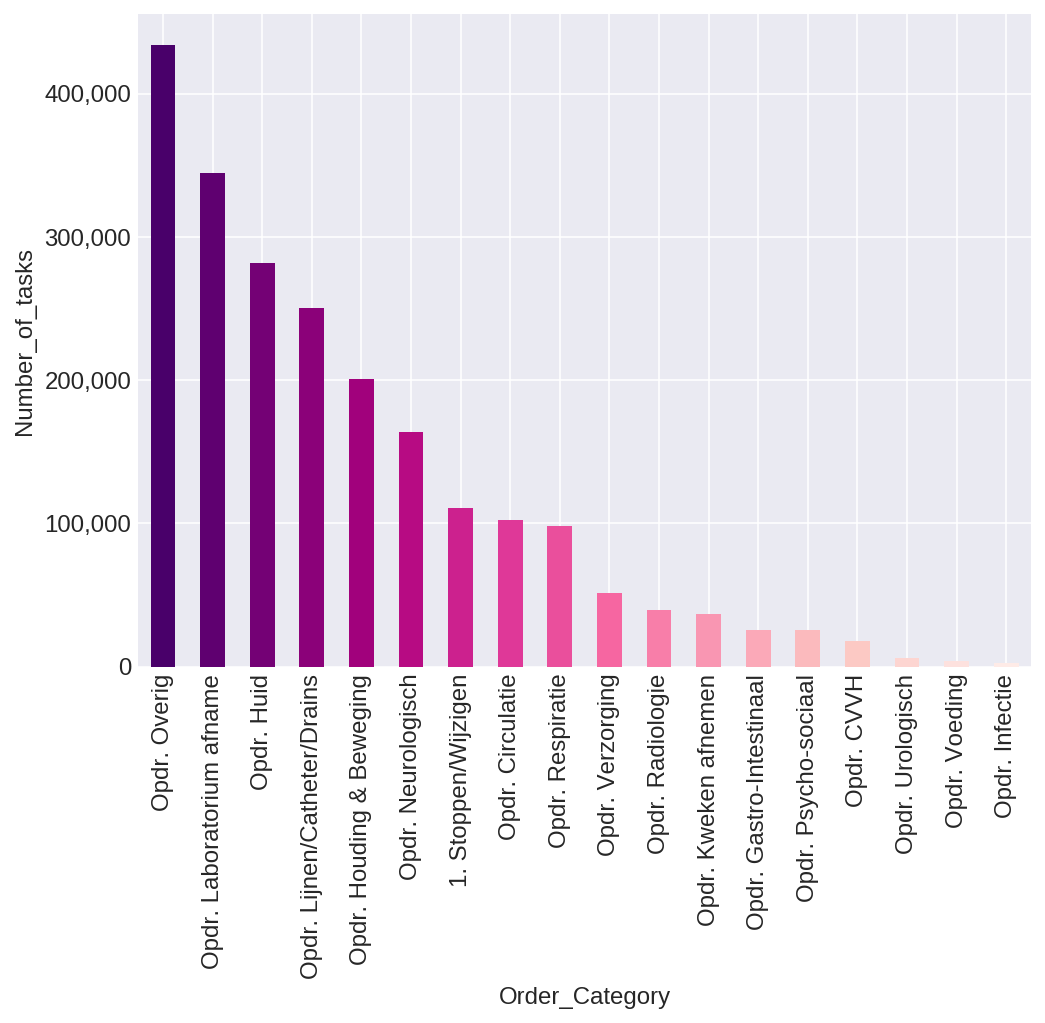

In [9]:
sql = """
SELECT ordercategoryname AS Order_Category, COUNT(ordercategoryname) AS Number_of_tasks, ordercategoryid
FROM procedureorderitems
GROUP BY ordercategoryname, ordercategoryid
ORDER BY Number_of_tasks DESC
"""
import matplotlib as mpl
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# registeredby
Most documentation of the tasks was performed by either the intensive care (IC) or medium care (MC) nurses

``` mysql

SELECT registeredby AS User_group, COUNT(registeredby) AS Number_of_tasks
FROM procedureorderitems
GROUP BY registeredby
ORDER BY Number_of_tasks DESC

```

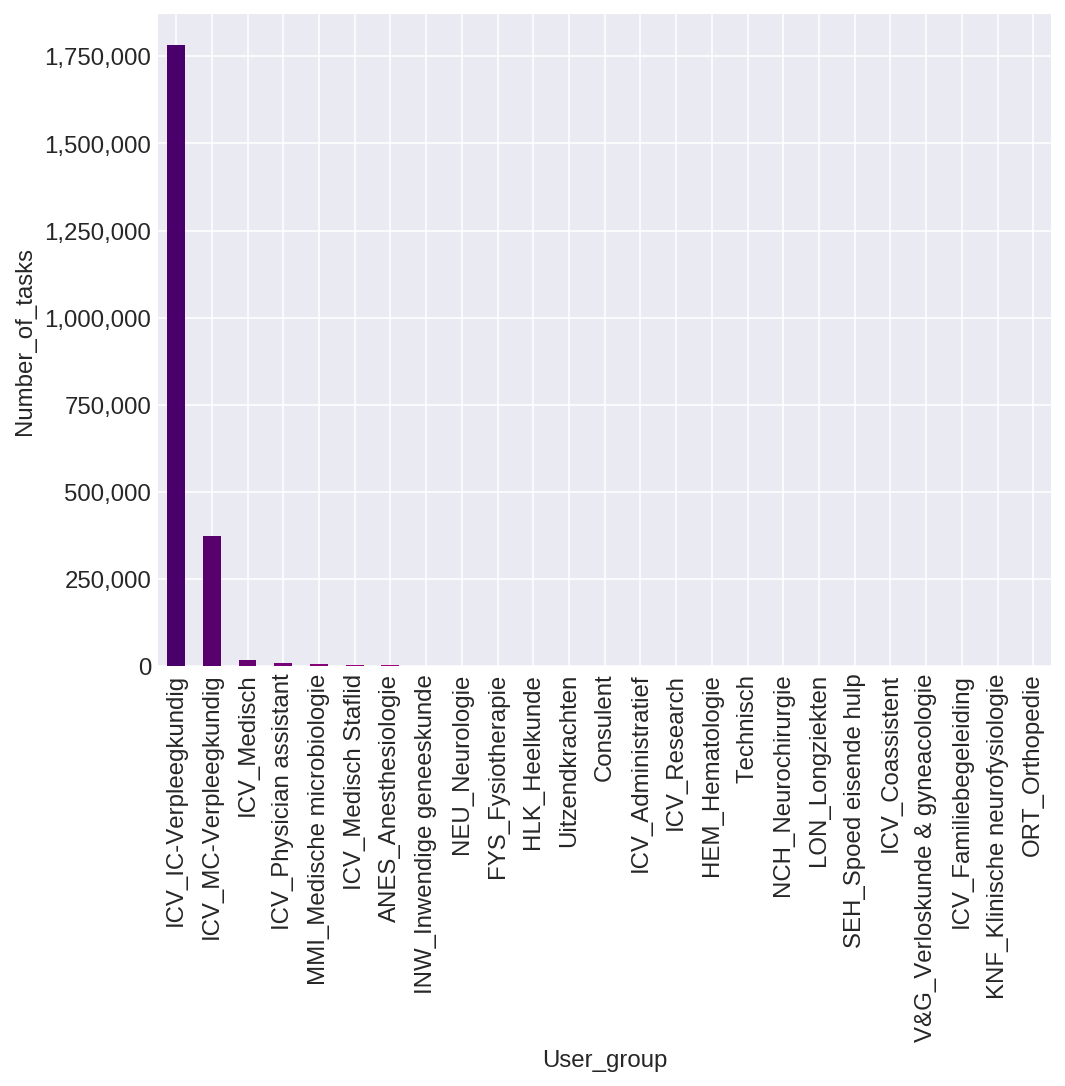

In [10]:
sql = """
SELECT registeredby AS User_group, COUNT(registeredby) AS Number_of_tasks
FROM procedureorderitems
GROUP BY registeredby
ORDER BY Number_of_tasks DESC
"""
import matplotlib as mpl
display(Markdown("``` mysql\n" + sql + "\n```"))
df = pd.read_gbq(sql, configuration=config)
cm = plt.get_cmap('RdPu')
color_step = int(-255/len(df.index))
ax = df.plot.bar(x=df.columns[0],y=df.columns[1], legend=False,color=cm(range(255,1,color_step)))
ax.set(ylabel=df.columns[1])
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))